In [58]:
import pandas as pd
df_input = pd.read_csv('sampled_data.csv')
df_inferenced = pd.read_csv('inference_output.csv')

In [59]:
print(len(df_input))
print(len(df_inferenced))

1000
1000


In [60]:
df_combined = pd.concat([df_input, df_inferenced], axis=1)

In [61]:
df_combined.head()

title  \
0  Live at Truthdig: Robert Scheer and Thomas Fra...   
1  The Mirage of a Return to Manufacturing Greatn...   
2  British PM expected to offer to fill post-Brex...   
3                                  Checkmating Obama   
4  Thirty-eight injured in police charges in Cata...   

                                                text  label Output  \
0  Live at Truthdig: Robert Scheer and Thomas Fra...      0   Real   
1  Half a century ago, harvesting California’s 2....      1   Real   
2  (Reuters) - The British government has told Ge...      1   fake   
3  Originally published by the Jerusalem Post . \...      0   fake   
4  MADRID (Reuters) - Emergency services have att...      1   Real   

   Tokens Used Finish Reason  
0          265          stop  
1         1627          stop  
2          200          stop  
3         2166          stop  
4          176          stop

In [62]:
df_combined["Finish Reason"].unique()

array(['stop', 'length'], dtype=object)

In [63]:
df_combined = df_combined[df_combined["Finish Reason"] != "length"]
len(df_combined)

994

In [64]:
df_combined.drop(columns=["title", "text", "Tokens Used", "Finish Reason"], inplace=True)

In [66]:
df_combined = df_combined.copy()
df_combined.loc[:, "Output"] = df_combined["Output"].str.strip().str.lower().map({"real": 1, "fake": 0})

C:\Users\kimi\AppData\Local\Temp\ipykernel_31372\3169472720.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_combined.loc[:, "Output"] = df_combined["Output"].str.strip().str.lower().map({"real": 1, "fake": 0})


In [68]:
len(df_combined)

994

Accuracy: 0.7323943661971831
F1 Score: 0.5969696969696969


C:\Users\kimi\AppData\Local\Temp\ipykernel_31372\2541391757.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


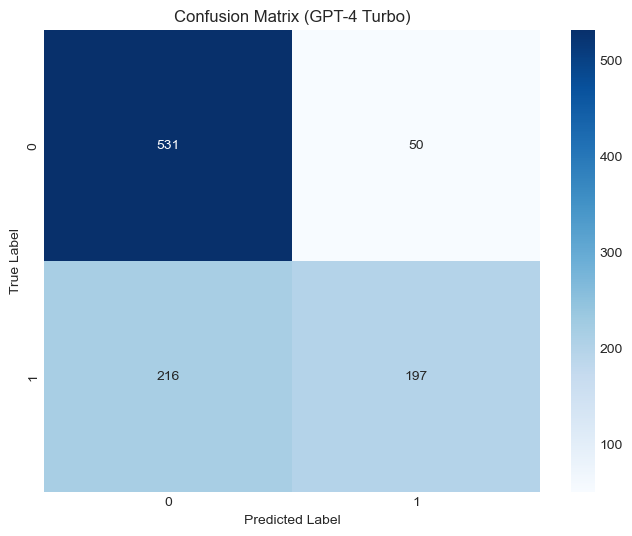

In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(df_combined["label"], df_combined["Output"])
f1 = f1_score(df_combined["label"], df_combined["Output"])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(df_combined["label"], df_combined["Output"])

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (GPT-4 Turbo)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()